# KNN Exercises

Create a new notebook, knn_model, and work with the titanic dataset. 


1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

2. Evaluate your results using the model score, confusion matrix, and classification report.

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps 1-3 setting k to 10

5. Run through steps 1-3 setting k to 20

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

7. Which model performs best on our out-of-sample data from validate?

<hr style="border:2px solid gray">

<b>Imports</b>

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import acquire
from prepare import prep_titanic_data
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

**Acquire & Prepare**

In [5]:
# Acquire Step
df = acquire.get_titanic_data()
# prepare the data
train, validate, test = prep_titanic_data(df)

# drop object columns and create X_train of features only 
# and y_train of survived only. 
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

# check the shape
X_train.shape, X_validate.shape, X_test.shape

((498, 9), (214, 9), (179, 9))

**Explore**

* Think back to your Explore lesson and ask questions you want to know about the data
* Make decisions on which varaibles to keep and which to discard
* Accomplish feature engineering to provide the model with new variables

**Model**

0. Baseline (mode of the target for classification problems)
1. Create Algorithm Object
2. Create Model by fitting algorithm to X_train, y_train
3. Run Model by predicting using X_train
4. Evaluate Model by comparing y_train_pred with y_train (actual values)
5. Run Model by predicting using X_validate
6. Evaluate Model by comparing y_validate_pred with y_validate (actual values)

**Baseline**

Let's make this easier next time, by writing a function to compute the baseline accuracy for classification problems. 

In [6]:
# write a function to compute the baseline for a classification model

def establish_baseline(y_train):
    #  establish the value we will predict for all observations
    baseline_prediction = y_train.mode()

    # create a series of predictions with that value, 
    # the same length as our training set
    y_train_pred = pd.Series([0]*len(y_train))

    # compute accuracy of baseline
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp+tn)/(tn+fp+fn+tp)
    return accuracy

In [7]:
establish_baseline(y_train)

0.6164658634538153

In [8]:
#Make it look nicer with a print statement
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(establish_baseline(y_train)))

Accuracy of KNN classifier on validate set: 0.62


### #1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [9]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)

### #2. Evaluate your results using the model score, confusion matrix, and classification report.

In [10]:
#get the accuracy score of train set
accuracy_train = knn.score(X_train, y_train)
accuracy_train

0.7951807228915663

In [11]:
#confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
             columns=['Pred 0', 'Pred 1'])

,Pred 0,Pred 1
Actual 0,258,49
Actual 1,53,138


In [12]:
#classification report
pd.DataFrame(classification_report(y_train, 
                                   y_train_pred, 
                                   output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.829582,0.737968,0.795181,0.783775,0.794445
recall,0.840391,0.722513,0.795181,0.781452,0.795181
f1-score,0.834951,0.730159,0.795181,0.782555,0.794760
support,307.000000,191.000000,0.795181,498.000000,498.000000


### #3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [13]:
def print_cm_metrics(cm):
    # extract tp, tn, fp, fn from the confusion matrix to use in calculations
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn)/(tn + fp + fn + tp)
    print(f"Accuracy: {accuracy}")

    true_positive_rate = tp/(tp + fn)
    print(f"True Positive Rate: {true_positive_rate}")

    false_positive_rate = fp/(fp + tn)
    print(f"False Positive Rate: {false_positive_rate}")

    true_negative_rate = tn/(tn + fp)
    print(f"True Negative Rate: {true_negative_rate}")

    false_negative_rate = fn/(fn + tp)
    print(f"False Negative Rate: {false_negative_rate}")

    precision = tp/(tp + fp)
    print(f"Precision: {precision}")

    recall = tp/(tp + fn)
    print(f"Recall: {recall}")

    f1_score = 2*(precision*recall)/(precision+recall)
    print(f"F1 Score: {f1_score}")

    support_pos = tp + fn
    print(f"Support (0): {support_pos}")

    support_neg = fp + tn
    print(f"Support (1): {support_neg}")
    
print_cm_metrics(cm)

Accuracy: 0.7951807228915663
True Positive Rate: 0.7225130890052356
False Positive Rate: 0.15960912052117263
True Negative Rate: 0.8403908794788274
False Negative Rate: 0.2774869109947644
Precision: 0.7379679144385026
Recall: 0.7225130890052356
F1 Score: 0.73015873015873
Support (0): 191
Support (1): 307


### #4. Run through steps 1-3 setting k to 10

<b>First, let's create a few functions to help us out</b>

In [15]:
def knn_fit_predict(k, X_train, y_train, X_validate):
    '''
    This function takes n_neighbors, X_train,  target  and X_val
    and returns knn, predictions for train set and validate set
    '''
    # create the object
    knn = KNeighborsClassifier(n_neighbors=k)

    # create the model
    knn.fit(X_train, y_train)

    # run the model
    y_train_pred = knn.predict(X_train)
    y_validate_pred = knn.predict(X_validate)
    
    return knn, y_train_pred, y_validate_pred

In [ ]:
def evaluate_clf(model, X, y, y_pred):
    '''
    This function can be used on any classification model
    It takes in a model, features, target and prediction
    and returns the accuracy, confusion matrix and classification report
    '''
    # model score
    accuracy = model.score(X, y)
    print(f'Accuracy: {accuracy}')

    # confusion matrix
    cm = confusion_matrix(y, y_pred)
    print('Confusion Matrix')
    print(pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
                       columns=['Pred 0', 'Pred 1']))

    # classification report
    print('Classification Report')
    print(pd.DataFrame(classification_report(y, y_pred,
                                             output_dict=True)))
    # confusion matrix metrics
    print_cm_metrics(cm)
    
    return accuracy

In [16]:
k = 10
print(f'KNN where K = {k}' )

knn, y_train_pred, y_validate_pred = knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_validate)

print('Train Evaluation\n')
train_accuracy = evaluate_clf(knn, X_train, y_train, y_train_pred)
print('\nValidate Evaluation\n')
validate_accuracy = evaluate_clf(knn, X_validate, 
                                 y_validate, y_validate_pred)

KNN where K = 10
Train Evaluation

Accuracy: 0.7449799196787149
Confusion Matrix
          Pred 0  Pred 1
Actual 0     275      32
Actual 1      95      96
Classification Report
                    0           1  accuracy   macro avg  weighted avg
precision    0.743243    0.750000   0.74498    0.746622      0.745835
recall       0.895765    0.502618   0.74498    0.699192      0.744980
f1-score     0.812408    0.601881   0.74498    0.707144      0.731663
support    307.000000  191.000000   0.74498  498.000000    498.000000
Accuracy: 0.7449799196787149
True Positive Rate: 0.5026178010471204
False Positive Rate: 0.10423452768729642
True Negative Rate: 0.8957654723127035
False Negative Rate: 0.4973821989528796
Precision: 0.75
Recall: 0.5026178010471204
F1 Score: 0.6018808777429466
Support (0): 191
Support (1): 307

Validate Evaluation

Accuracy: 0.7242990654205608
Confusion Matrix
          Pred 0  Pred 1
Actual 0     115      17
Actual 1      42      40
Classification Report
             

### #5. Run through steps 1-3 setting k to 20

In [17]:
k = 20
print(f'KNN where K = {k}' )

knn, y_train_pred, y_validate_pred = knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_validate)

print('Train Evaluation\n')
train_accuracy = evaluate_clf(knn, X_train, y_train, y_train_pred)
print('\nValidate Evaluation\n')
validate_accuracy = evaluate_clf(knn, X_validate, 
                                 y_validate, y_validate_pred)

KNN where K = 20
Train Evaluation

Accuracy: 0.7188755020080321
Confusion Matrix
          Pred 0  Pred 1
Actual 0     269      38
Actual 1     102      89
Classification Report
                    0           1  accuracy   macro avg  weighted avg
precision    0.725067    0.700787  0.718876    0.712927      0.715755
recall       0.876221    0.465969  0.718876    0.671095      0.718876
f1-score     0.793510    0.559748  0.718876    0.676629      0.703855
support    307.000000  191.000000  0.718876  498.000000    498.000000
Accuracy: 0.7188755020080321
True Positive Rate: 0.46596858638743455
False Positive Rate: 0.1237785016286645
True Negative Rate: 0.8762214983713354
False Negative Rate: 0.5340314136125655
Precision: 0.7007874015748031
Recall: 0.46596858638743455
F1 Score: 0.559748427672956
Support (0): 191
Support (1): 307

Validate Evaluation

Accuracy: 0.7149532710280374
Confusion Matrix
          Pred 0  Pred 1
Actual 0     112      20
Actual 1      41      41
Classification Report

### #6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why? 

In [18]:
metrics = []

for k in range(1,20):
    knn, y_train_pred, y_val_pred = knn_fit_predict(k, X_train, 
                                                    y_train, 
                                                    X_validate)
    train_acc = knn.score(X_train, y_train)
    val_acc = knn.score(X_validate, y_validate)
    
    output = {
            "k": k,
            "train_accuracy": train_acc,
            "validate_accuracy": val_acc
    }

    metrics.append(output)
    
eval_df = pd.DataFrame(metrics)
eval_df['difference'] = eval_df['train_accuracy'] - eval_df['validate_accuracy']

eval_df

,k,train_accuracy,validate_accuracy,difference
0,1,0.995984,0.700935,0.295049
1,2,0.827309,0.696262,0.131048
2,3,0.839357,0.742991,0.096367
3,4,0.797189,0.710280,0.086908
4,5,0.795181,0.714953,0.080227
5,6,0.765060,0.728972,0.036088
6,7,0.763052,0.705607,0.057445
7,8,0.746988,0.719626,0.027362
8,9,0.763052,0.696262,0.066791
9,10,0.744980,0.724299,0.020681


### #7. Which model performs best on our out-of-sample data from ```validate```?

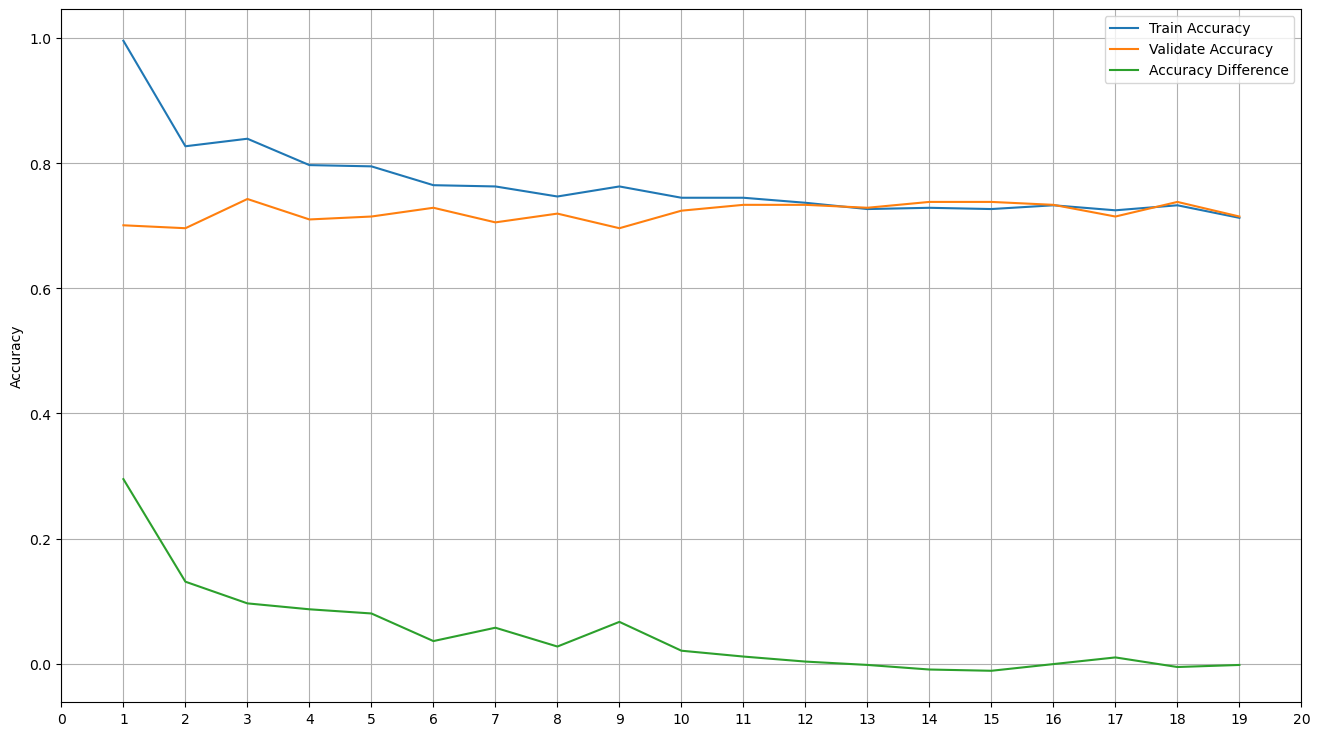

In [19]:
# plot the data
plt.figure(figsize=(16,9))
plt.plot(eval_df.k, eval_df.train_accuracy, label='Train Accuracy')
plt.plot(eval_df.k, eval_df.validate_accuracy, label='Validate Accuracy')
plt.plot(eval_df.k, eval_df.difference, label='Accuracy Difference')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(np.arange(0,21,1))
plt.grid()
plt.show()

<div class="alert alert-block alert-success">
<b>Takeaway:</b>
    <br>
Looking at this chart, I would select k=12 as the best model. 
    </div>

In [21]:
k = 12
print(f'KNN where K = {k}' )

knn, y_train_pred, y_validate_pred = knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_validate)

print('Train Evaluation\n')
train_accuracy = evaluate_clf(knn, X_train, y_train, y_train_pred)

print('\nValidate Evaluation\n')
validate_accuracy = evaluate_clf(knn, X_validate, 
                                 y_validate, y_validate_pred)

KNN where K = 12
Train Evaluation

Accuracy: 0.7369477911646586
Confusion Matrix
          Pred 0  Pred 1
Actual 0     275      32
Actual 1      99      92
Classification Report
                    0           1  accuracy   macro avg  weighted avg
precision    0.735294    0.741935  0.736948    0.738615      0.737841
recall       0.895765    0.481675  0.736948    0.688720      0.736948
f1-score     0.807636    0.584127  0.736948    0.695881      0.721913
support    307.000000  191.000000  0.736948  498.000000    498.000000
Accuracy: 0.7369477911646586
True Positive Rate: 0.4816753926701571
False Positive Rate: 0.10423452768729642
True Negative Rate: 0.8957654723127035
False Negative Rate: 0.518324607329843
Precision: 0.7419354838709677
Recall: 0.4816753926701571
F1 Score: 0.584126984126984
Support (0): 191
Support (1): 307

Validate Evaluation

Accuracy: 0.7336448598130841
Confusion Matrix
          Pred 0  Pred 1
Actual 0     115      17
Actual 1      40      42
Classification Report
 

<div class="alert alert-block alert-success">
<b>Takeaway:</b>
    <br>
12 nearest neighbors works best on the in-sample and out-of-sample data. However, the f1 score is better on the model where k = 20, so it is a bit more balanced. BUT, let's loop through different K's and see what number of neighbors gives us the best results. </div>